## In this notebook we demonstrate the results for Solar Energy Generation Prediction

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [4]:
# Original Datasets
#weather = pd.read_csv("/Users/anastasiakurakova/Desktop/BDA 602 project/Spain Weather/weather_features_collapsed.csv")
energy = pd.read_csv("/Users/anastasiakurakova/Desktop/BDA 602 project/Spain Weather/energy_modified.csv")

In [5]:
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [275]:
# Time to datetime format
energy['time'] = pd.to_datetime(energy['time'],utc='True',errors='coerce')
energy['time'] = energy['time'].dt.tz_localize(None)
energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [299]:
# Creating Dataset for Analysis
df=energy[['time','generation solar']].copy()
df.head()

,time,generation solar
0,2014-12-31 23:00:00,49.0
1,2015-01-01 00:00:00,50.0
2,2015-01-01 01:00:00,50.0
3,2015-01-01 02:00:00,50.0
4,2015-01-01 03:00:00,42.0


In [300]:
# Aggregating monthly data
monthly_data = df.resample('M', on='time').mean()

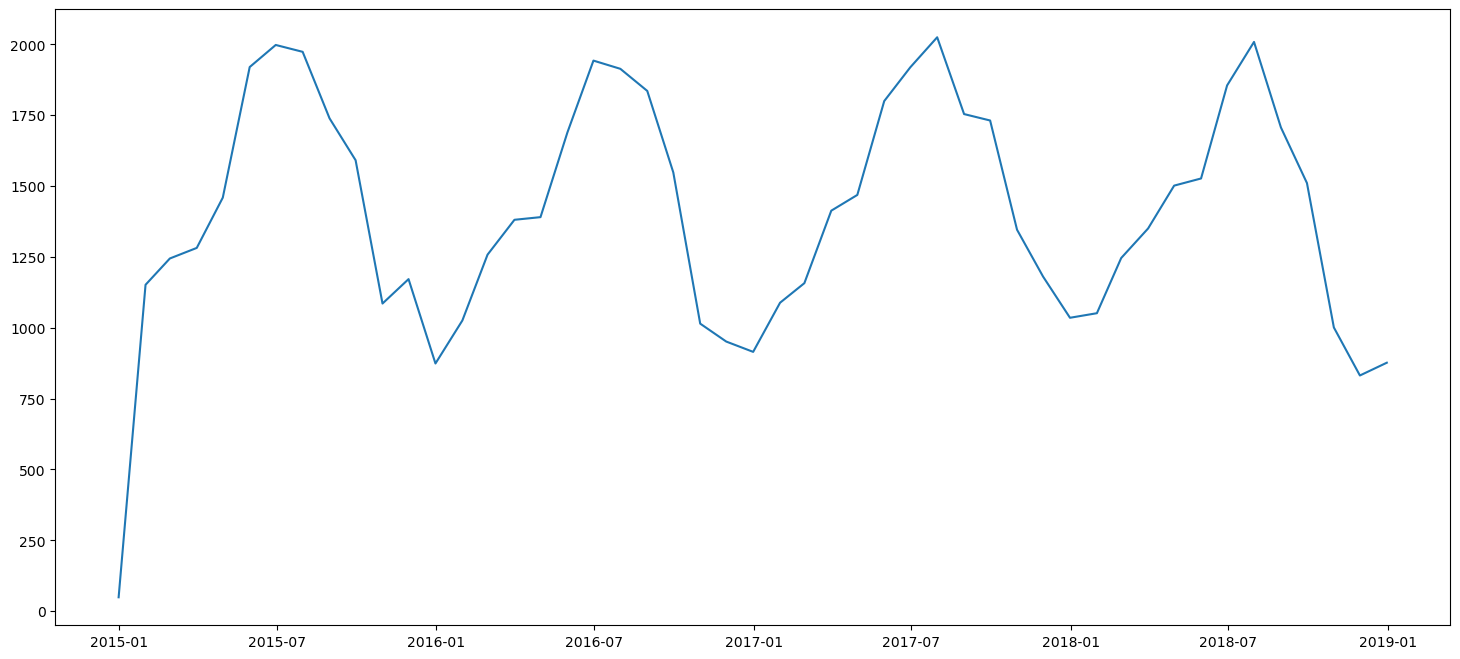

In [278]:
plt.plot(monthly_data.index, monthly_data['generation solar'], label='Solar (Monthly)')

In [264]:
monthly_data.head()

,generation solar
time,
2014-12-31,49.000000
2015-01-31,1151.718184
2015-02-28,1244.546131
2015-03-31,1281.852151
2015-04-30,1459.285068


In [279]:
# Train/Test Split
train = monthly_data.loc[monthly_data.index < '2018-05-01']
test = monthly_data.loc[monthly_data.index >= '2018-05-01']

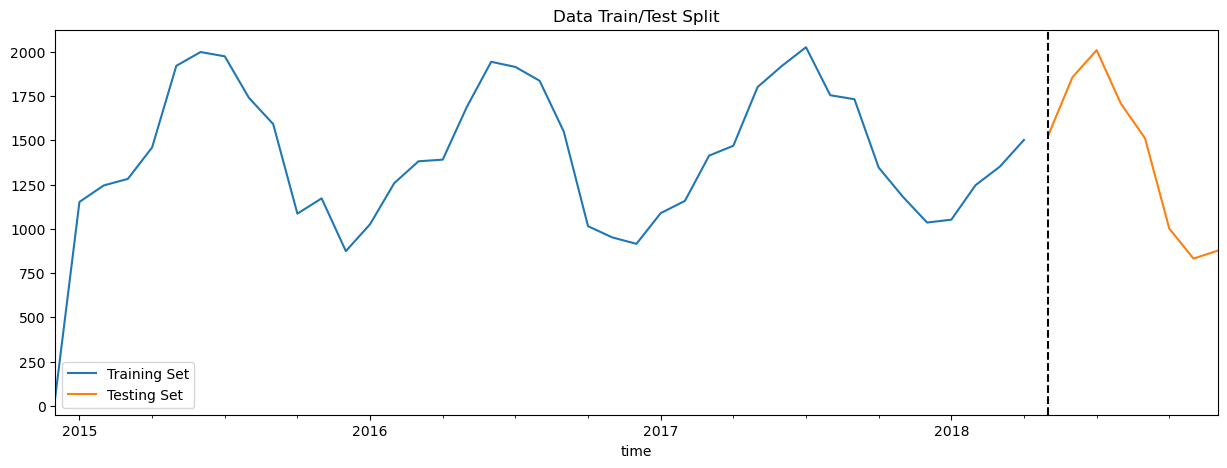

In [280]:
fig, ax = plt.subplots(figsize= (15,5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Testing Set')
ax.axvline('2018-05-01',color='black',ls='--')
ax.legend(['Training Set','Testing Set'])
plt.show()

In [281]:
# Creating Features From Time Column
def create_features(df):
    """
    Creating features
    """
    df=df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df
monthly_data = create_features(monthly_data)

Text(0.5, 1.0, 'Total Renewable Energy Generated (MW) per month')

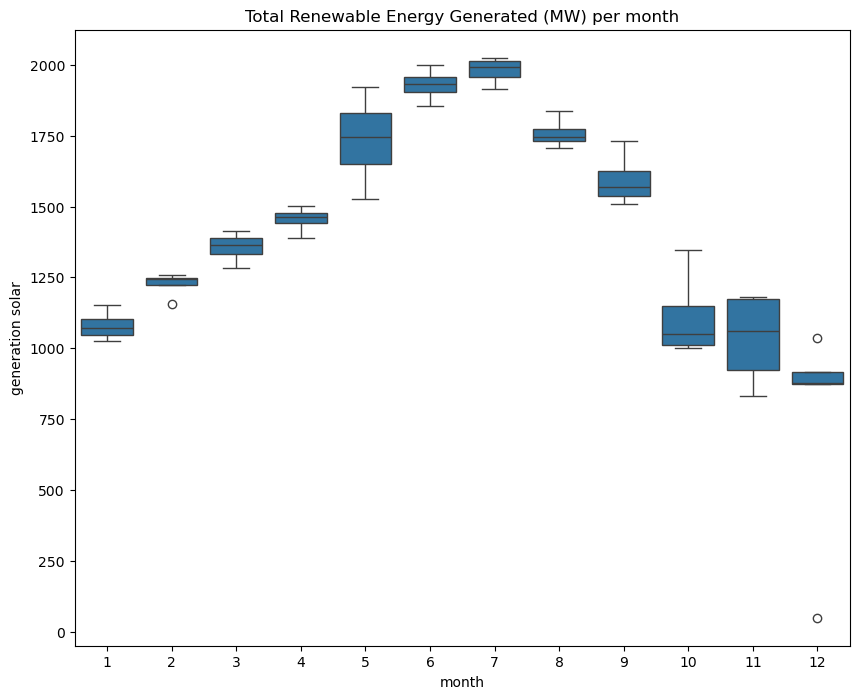

In [282]:
# Visualize feature to target variable
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=monthly_data,x='month',y='generation solar')
ax.set_title('Total Renewable Energy Generated (MW) per month')

In [283]:
train = create_features(train)
test = create_features(test)
features = ['hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear']
target = 'generation solar'
#target = 'generation wind onshore'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [284]:
# Training XGBoost Regressor Model
reg = xgb.XGBRegressor(n_estimators= 1000,early_stopping_rounds= 50,learning_rate=0.01)
reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose= True)

[0]	validation_0-rmse:398.88976	validation_1-rmse:423.24109
[1]	validation_0-rmse:395.89019	validation_1-rmse:419.92724
[2]	validation_0-rmse:392.92019	validation_1-rmse:416.90888
[3]	validation_0-rmse:389.97989	validation_1-rmse:413.92614
[4]	validation_0-rmse:387.06961	validation_1-rmse:410.72240
[5]	validation_0-rmse:384.18790	validation_1-rmse:407.81009
[6]	validation_0-rmse:381.33519	validation_1-rmse:404.93251
[7]	validation_0-rmse:378.51120	validation_1-rmse:402.08939
[8]	validation_0-rmse:375.71636	validation_1-rmse:399.02848
[9]	validation_0-rmse:372.94904	validation_1-rmse:396.25346
[10]	validation_0-rmse:370.20972	validation_1-rmse:393.51199
[11]	validation_0-rmse:367.49820	validation_1-rmse:390.80388
[12]	validation_0-rmse:364.81407	validation_1-rmse:388.12878
[13]	validation_0-rmse:362.15788	validation_1-rmse:385.24009
[14]	validation_0-rmse:359.52792	validation_1-rmse:382.63030
[15]	validation_0-rmse:356.92436	validation_1-rmse:380.05271
[16]	validation_0-rmse:354.34708	v

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature Importance'}>

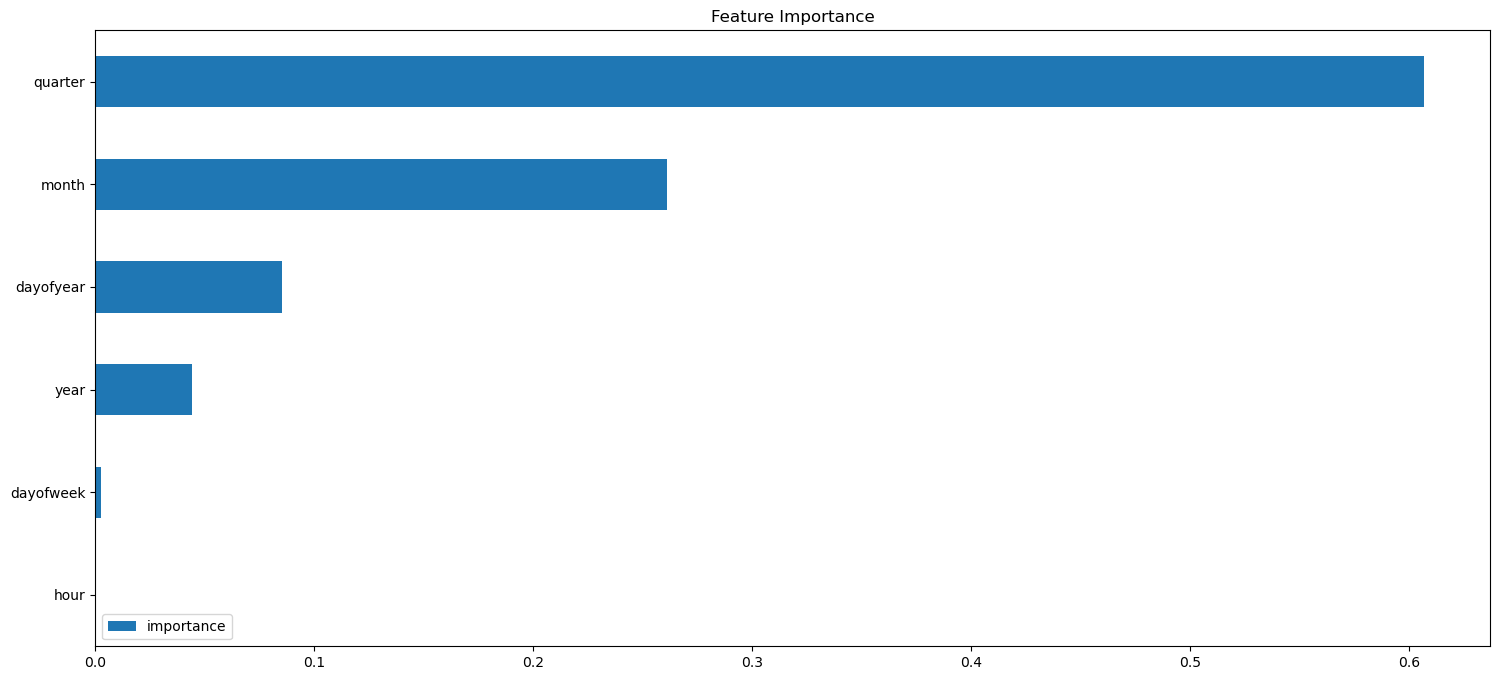

In [285]:
# Looking at the feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index= reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh',title='Feature Importance')

In [286]:
# Forecast on Test
test['prediction'] = reg.predict(X_test)
df1 = monthly_data.merge(test[['prediction']], how='left', left_index=True,right_index=True)

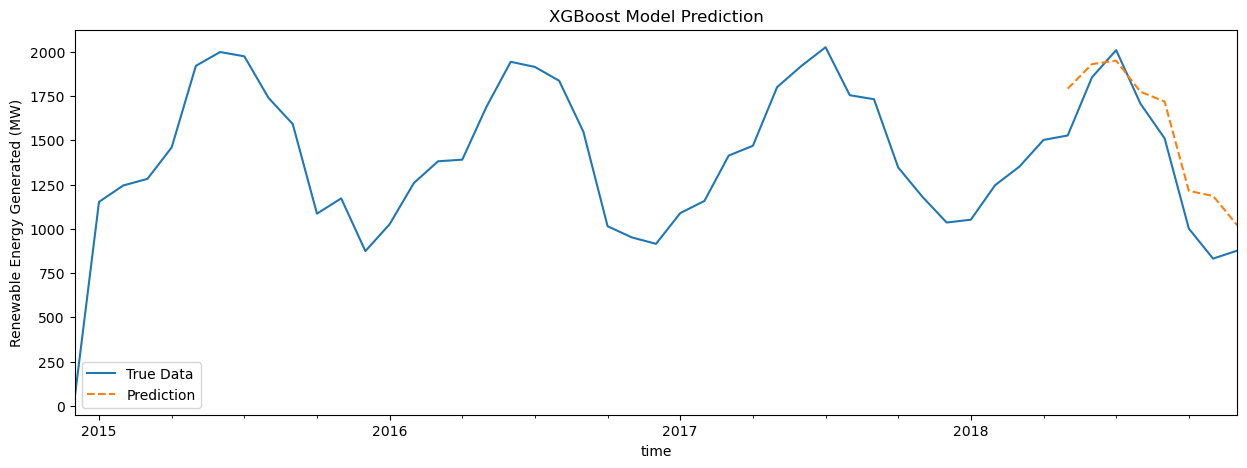

In [287]:
ax = df1[['generation solar']].plot(figsize=(15,5))
df1[['prediction']].plot(ax=ax, style='--')
plt.legend(['True Data','Prediction'])
ax.set_title('XGBoost Model Prediction')
ax.set_ylabel('Renewable Energy Generated (MW)')
plt.show()

In [274]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(test['generation solar'],test['prediction']))
mae = mean_absolute_error(test['generation solar'],test['prediction'])
r2 = r2_score(test['generation solar'],test['prediction'])
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2-score: {r2}')

RMSE: 199.19407636556775
MAE: 172.82954446254456
R2-score: 0.7817649368708336


### R-squared of 0.78 is a good result for the prediction model. However, it should be noted that if we agregate our data Daily instead of monthly, model performance decreases significantly

In [ ]:
# Results for Daily Aggregation
#RMSE: 528.0238822532858
#MAE: 429.2774205551952
#R2-score: 0.4724590996187821

In [243]:
# Using Mean Absolute Percentage Error.
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred= np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape = mean_absolute_percentage_error(test['generation solar'],test['prediction'])
mape

15.258775787644138

### Trying Prophet for Solar Prediction

In [298]:
# Monthly data aggregation

monthly_data = df.resample('M', on='time').mean()
monthly_data=monthly_data.reset_index()

,level_0,index,generation solar
time,,,
2014-12-31,0.0,0.0,49.000000
2015-01-31,372.5,372.5,1151.718184
2015-02-28,1080.5,1080.5,1244.546131
2015-03-31,1788.5,1788.5,1281.852151
2015-04-30,2520.5,2520.5,1459.285068


In [304]:
df_prophet=monthly_data.rename(columns={'time':'ds','generation solar':'y'})
df_prophet.head()

,ds,y
0,2014-12-31,49.000000
1,2015-01-31,1151.718184
2,2015-02-28,1244.546131
3,2015-03-31,1281.852151
4,2015-04-30,1459.285068


In [305]:
# Training the model
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)

16:01:44 - cmdstanpy - INFO - Chain [1] start processing
16:01:44 - cmdstanpy - INFO - Chain [1] done processing


In [306]:
future_p = model.make_future_dataframe(periods=300)
future_p.tail()

,ds
344,2019-10-23
345,2019-10-24
346,2019-10-25
347,2019-10-26
348,2019-10-27


In [307]:
forecast_p = model.predict(future_p)
forecast_p[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-12-31,701.121486,530.882160,874.153893
1,2015-01-31,1071.232182,907.509732,1238.255018
2,2015-02-28,1231.592870,1061.583698,1407.324057
3,2015-03-31,1279.967146,1104.196428,1446.262205
4,2015-04-30,1453.331246,1284.499934,1627.571429


/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


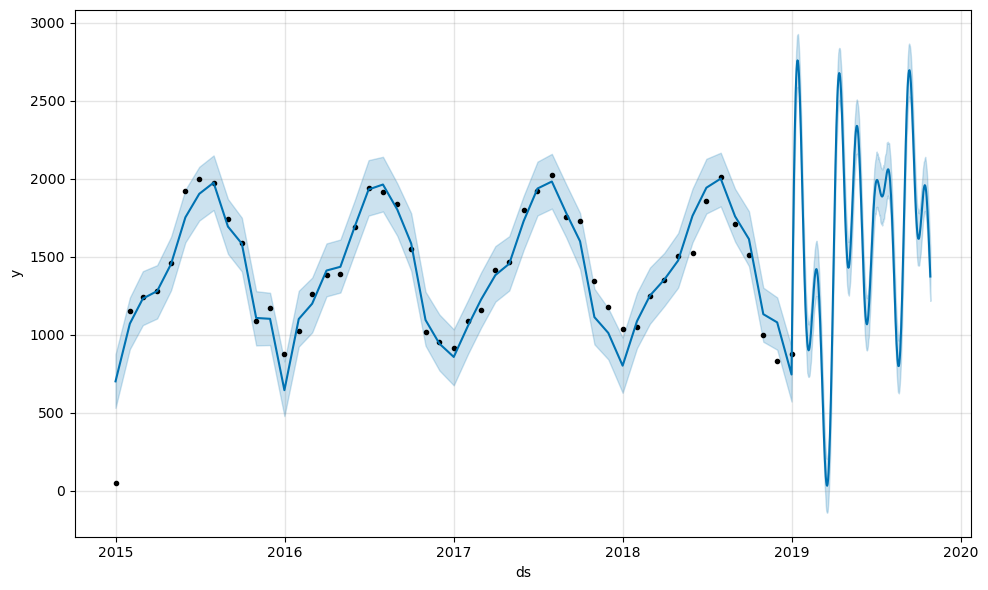

In [308]:
fig_p = model.plot(forecast_p)

/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/anastasiakurakova/miniconda3/envs/ml/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

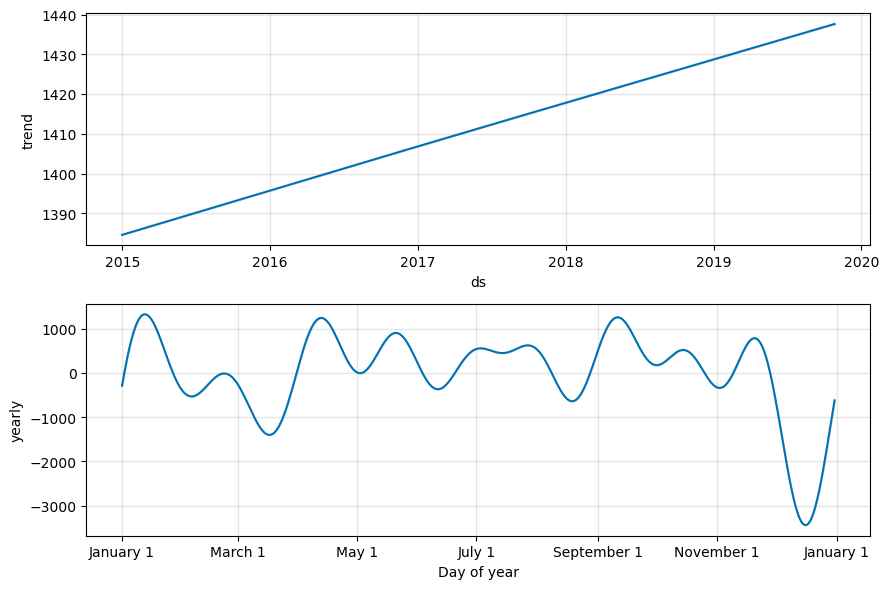

In [309]:
fig2_p = model.plot_components(forecast_p)

In [310]:
# Evaluating model performance
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Perform cross-validation
df_cv = cross_validation(model, initial='985 days', period='110 days', horizon='365 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)


# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)
rsq = r2_score(df_cv['y'], df_cv['yhat'])


print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {rsq:.2f}')

  0%|          | 0/2 [00:00<?, ?it/s]

16:02:23 - cmdstanpy - INFO - Chain [1] start processing
16:02:24 - cmdstanpy - INFO - Chain [1] done processing
16:02:24 - cmdstanpy - INFO - Chain [1] start processing
16:02:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 164.79
Mean Squared Error: 43494.79
Root Mean Squared Error: 208.55
R-squared: 0.62


### This is the performance of Prophet model without fine tuning. Next we'll perform grid search to see if the result can be improved.

In [311]:

# Define the hyperparameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1, 10, 30],
}


# Helper function to evaluate the model
def evaluate_model(model, metric_func):
    df_cv = cross_validation(model, initial='995 days', period='100 days', horizon='365 days')
    return metric_func(df_cv['y'], df_cv['yhat'])


# Grid search
best_params = {}
best_score = float('inf')

for mode in param_grid['seasonality_mode']:
    for cps in param_grid['changepoint_prior_scale']:
        for sps in param_grid['seasonality_prior_scale']:
            # Create a model with the current hyperparameters
            model = Prophet(seasonality_mode=mode, changepoint_prior_scale=cps, seasonality_prior_scale=sps)
            model.fit(df_prophet)

            # Evaluate the model using Mean Absolute Error (MAE)
            score = evaluate_model(model, mean_absolute_error)

            # Update best parameters if necessary
            if score < best_score:
                best_score = score
                best_params = {
                    'seasonality_mode': mode,
                    'changepoint_prior_scale': cps,
                    'seasonality_prior_scale': sps
                }

print(best_params)
print(best_score)

# Create the best model with the optimal hyperparameters
best_model = Prophet(**best_params)
best_model.fit(df_prophet)

16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:44 - cmdstanpy - INFO - Chain [1] done processing
16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:44 - cmdstanpy - INFO - Chain [1] done processing
16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:44 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:45 - cmdstanpy - INFO - Chain [1] start processing
16:03:45 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:46 - cmdstanpy - INFO - Chain [1] done processing
16:03:46 - cmdstanpy - INFO - Chain [1] start processing
16:03:47 - cmdstanpy - INFO - Chain [1] done processing
16:03:47 - cmdstanpy - INFO - Chain [1] start processing
16:03:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:47 - cmdstanpy - INFO - Chain [1] start processing
16:03:48 - cmdstanpy - INFO - Chain [1] done processing
16:03:48 - cmdstanpy - INFO - Chain [1] start processing
16:03:48 - cmdstanpy - INFO - Chain [1] done processing
16:03:48 - cmdstanpy - INFO - Chain [1] start processing
16:03:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:49 - cmdstanpy - INFO - Chain [1] start processing
16:03:49 - cmdstanpy - INFO - Chain [1] done processing
16:03:49 - cmdstanpy - INFO - Chain [1] start processing
16:03:49 - cmdstanpy - INFO - Chain [1] done processing
16:03:49 - cmdstanpy - INFO - Chain [1] start processing
16:03:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:50 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:51 - cmdstanpy - INFO - Chain [1] done processing
16:03:51 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:52 - cmdstanpy - INFO - Chain [1] done processing
16:03:52 - cmdstanpy - INFO - Chain [1] start processing
16:03:53 - cmdstanpy - INFO - Chain [1] done processing
16:03:53 - cmdstanpy - INFO - Chain [1] start processing
16:03:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:53 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:54 - cmdstanpy - INFO - Chain [1] done processing
16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing
16:03:55 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing
16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing
16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:56 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:57 - cmdstanpy - INFO - Chain [1] done processing
16:03:57 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:58 - cmdstanpy - INFO - Chain [1] done processing
16:03:58 - cmdstanpy - INFO - Chain [1] start processing
16:03:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:03:59 - cmdstanpy - INFO - Chain [1] start processing
16:03:59 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing
16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/2 [00:00<?, ?it/s]

16:04:00 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing
16:04:01 - cmdstanpy - INFO - Chain [1] start processing
16:04:01 - cmdstanpy - INFO - Chain [1] done processing


{'seasonality_mode': 'multiplicative', 'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1}
145.76339807586456


In [358]:

# Perform cross-validation
df_cv = cross_validation(best_model, initial='985 days', period='110 days', horizon='365 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)


# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(df_cv['y'], df_cv['yhat'])
mse = mean_squared_error(df_cv['y'], df_cv['yhat'])
rmse = np.sqrt(mse)
rsq = r2_score(df_cv['y'], df_cv['yhat'])

print("Best Model Evaluation: ")
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {rsq:.2f}')

  0%|          | 0/2 [00:00<?, ?it/s]

20:09:45 - cmdstanpy - INFO - Chain [1] start processing
20:09:45 - cmdstanpy - INFO - Chain [1] done processing
20:09:45 - cmdstanpy - INFO - Chain [1] start processing
20:09:45 - cmdstanpy - INFO - Chain [1] done processing


Best Model Evaluation: 
Mean Absolute Error: 145.76
Mean Squared Error: 36359.98
Root Mean Squared Error: 190.68
R-squared: 0.68


### It can be observed that the performance the model improved even further. However, it's still lower than XGBoost.

In [313]:
future_p = best_model.make_future_dataframe(periods=300)
future_p.tail()

,ds
344,2019-10-23
345,2019-10-24
346,2019-10-25
347,2019-10-26
348,2019-10-27


In [314]:
forecast_p = best_model.predict(future_p)
forecast_p[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-12-31,731.348882,553.815476,908.434466
1,2015-01-31,1089.093848,920.976092,1267.733606
2,2015-02-28,1249.346410,1063.509626,1425.211674
3,2015-03-31,1312.148302,1141.450392,1480.674382
4,2015-04-30,1471.913260,1308.095187,1639.519779


### We were not able to use monthly data for SARIMAX as it was not enough values to make predictions. Therefore we chose to aggregate Daily values

In [317]:
df.head()

,time,generation solar
0,2014-12-31 23:00:00,49.0
1,2015-01-01 00:00:00,50.0
2,2015-01-01 01:00:00,50.0
3,2015-01-01 02:00:00,50.0
4,2015-01-01 03:00:00,42.0


In [333]:
df_1=df.set_index('time')
df_1.head()

,generation solar
time,
2014-12-31 23:00:00,49.0
2015-01-01 00:00:00,50.0
2015-01-01 01:00:00,50.0
2015-01-01 02:00:00,50.0
2015-01-01 03:00:00,42.0


In [348]:
df_s = df_1.resample('D').mean()

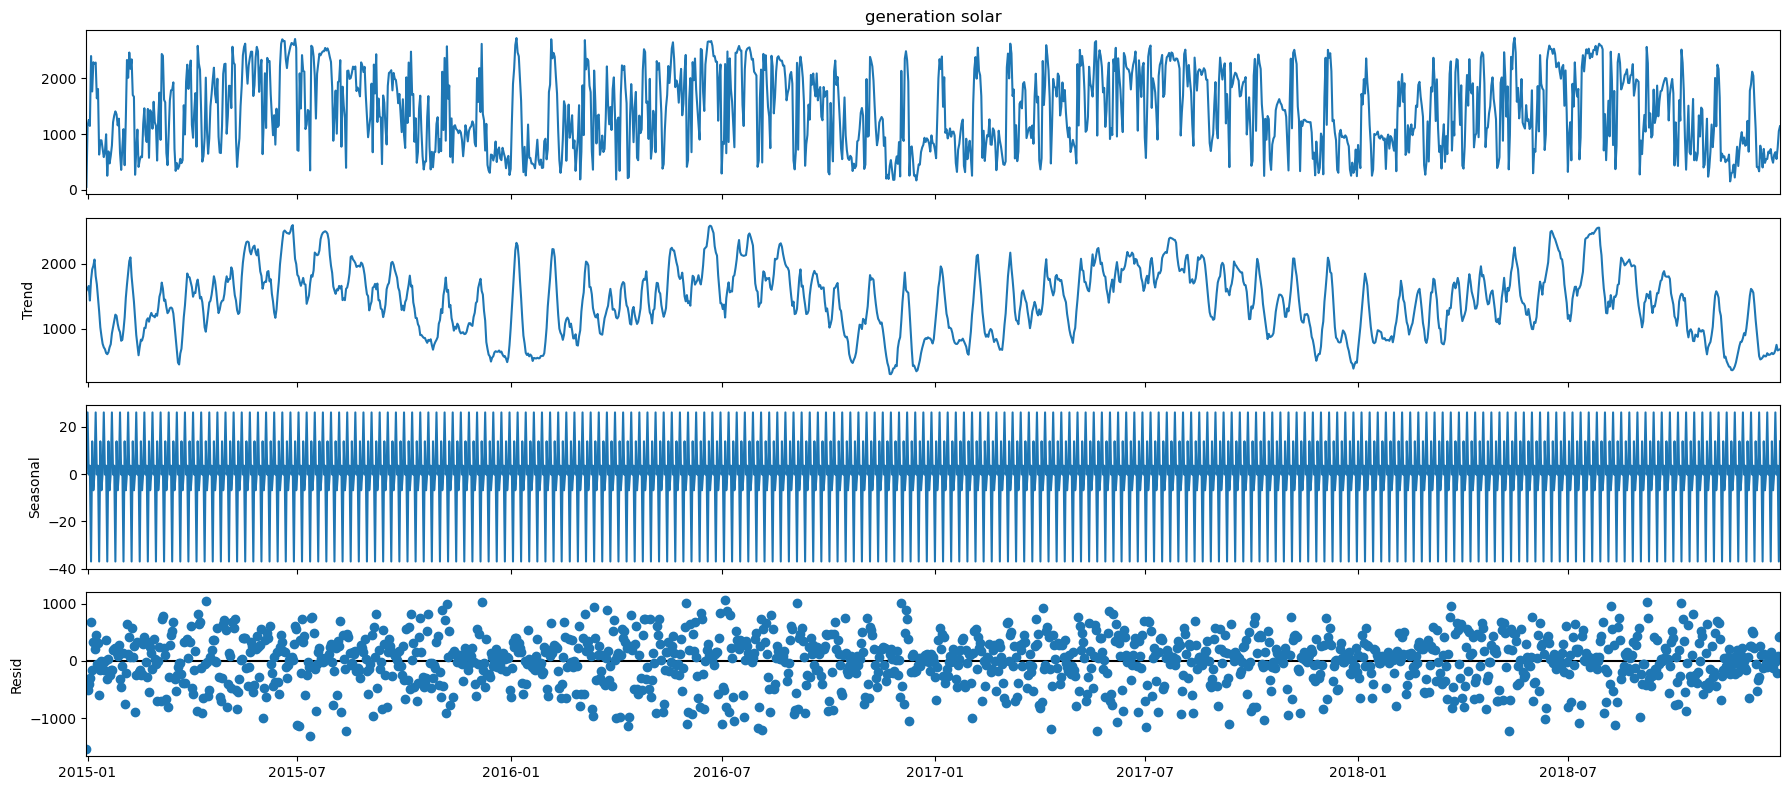

In [349]:
# On this plot we can observe seasonality and fluctuation of the data
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_s['generation solar'], model='additive', 
                            extrapolate_trend='freq') #additive or multiplicative is data specific
fig = decomposition.plot()
plt.show()

In [357]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [321]:
# Finding the best model parameters
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_s['generation solar'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:25697.71898526536
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:24688.14713777533
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:23909.986551134985
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:22950.670614348237
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23795.303345866298
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:23161.60384614455
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:23290.04483469046
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:22946.75141062835
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:24472.104588227827
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:23811.537008085106
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:23496.16104144297
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:22473.377447502688
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:23327.3079300465
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:22669.398008859396
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:22904.412931548097
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:22464.925810700704
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:22792.55970495417
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:22603.300125954825
A

In [350]:
mod = sm.tsa.statespace.SARIMAX(df_s['generation solar'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit(disp=0)
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5303      0.025     21.342      0.000       0.482       0.579
ma.L1         -0.9583      0.009   -103.857      0.000      -0.976      -0.940
ar.S.L12      -0.0677      0.028     -2.434      0.015      -0.122      -0.013
ma.S.L12      -1.0000      0.036    -27.528      0.000      -1.071      -0.929
sigma2      2.819e+05   1.29e-07   2.19e+12      0.000    2.82e+05    2.82e+05


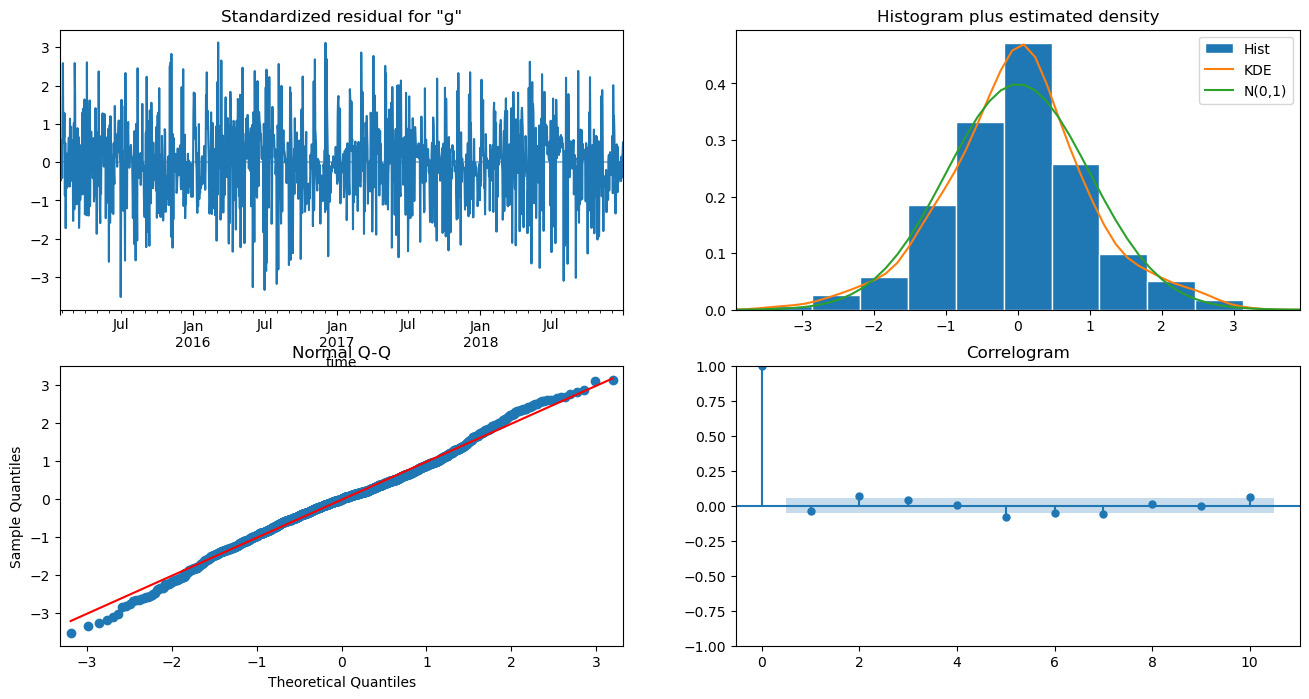

In [351]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

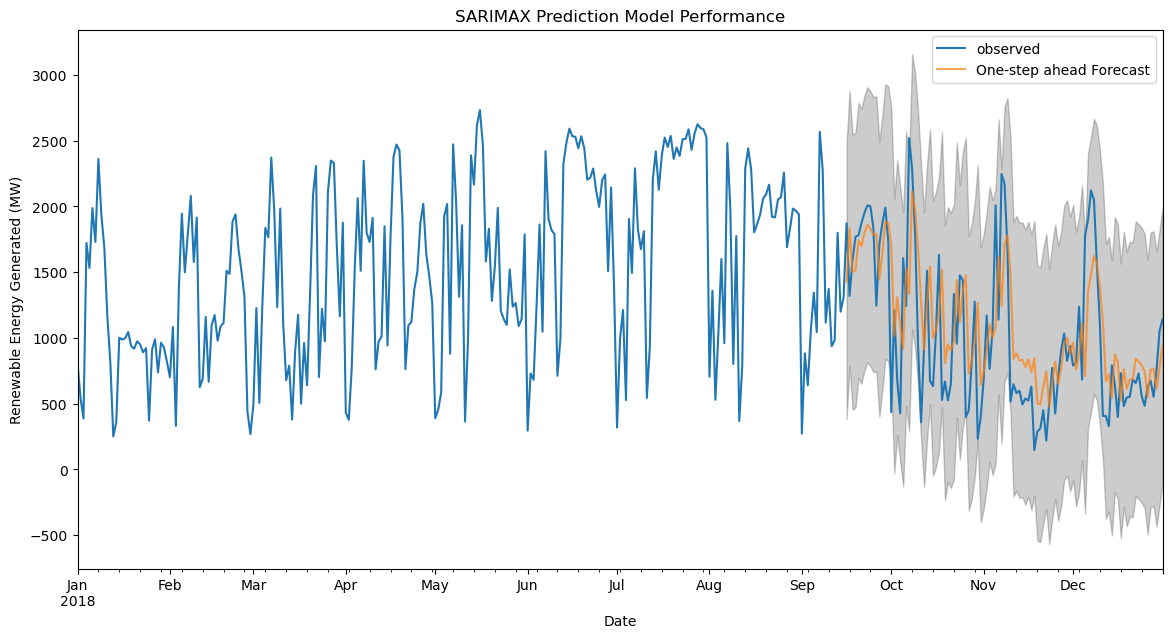

In [352]:

pred = results.get_prediction(start=pd.to_datetime('2018-09-16'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_s['generation solar']['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_title('SARIMAX Prediction Model Performance')
ax.set_xlabel('Date')
ax.set_ylabel('Renewable Energy Generated (MW)')
plt.legend()
plt.show()

In [353]:
y_forecasted = pred.predicted_mean
y_truth = df_s['generation solar']['2018-09-16':]

In [354]:
# Evaluating model performance
rmse = np.sqrt(mean_squared_error(y_forecasted,y_truth))
mae = mean_absolute_error(y_forecasted,y_truth)
r2 = r2_score(y_forecasted,y_truth)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R2-score: {r2}')

RMSE: 447.11171092677574
MAE: 338.70278183628784
R2-score: -0.15582117717338662


### Since we were not able to aggregate by month for this model RMSE and MAE values can't be compared to the ones from the Previous 2 models directly. However, it looks like r-squared value is still unsatisfactory even with low MAE and RMSE values

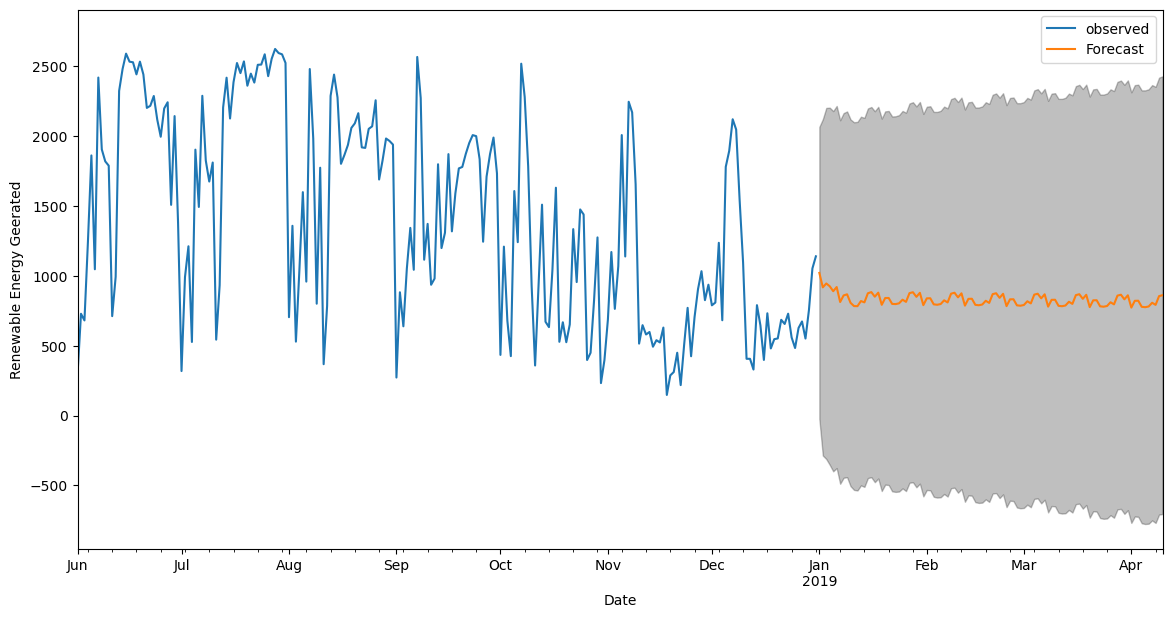

In [356]:
#Forecasting using SARIMAX
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = df_s['generation solar'].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Renewable Energy Geerated')
plt.legend()
ax.set_xlim(pd.Timestamp('2018-06-01'))
plt.show()